In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create dataset

In [7]:
X = np.array([[-1., -1.],
            [-1., 1.],
            [1., -1.],
            [1., 1.]])
y = np.array([[-1.],
             [1.],
             [1.],
             [-1.]])

print(X.shape, y.shape)

(4, 2) (4, 1)


# Create Model

## Define Placeholder and Variables(Model Architecture)

In [19]:
HIDDEN = 10

Xp = tf.placeholder(tf.float64, [None, 2])
yp = tf.placeholder(tf.float64, [None, 1])
W = tf.Variable(np.random.normal(size=(2, HIDDEN))/np.sqrt(HIDDEN))
b = tf.Variable(np.zeros(shape=(HIDDEN,)))
v = tf.Variable(np.random.normal(size=(HIDDEN, 1))/np.sqrt(HIDDEN))

[[-0.73275679]
 [ 0.82147749]
 [ 0.89743754]
 [-0.95771987]]


## Train Model

In [28]:
h = Xp @ W + b
h = tf.nn.relu(h)
y_pred = h @ v
loss = 0.5 * tf.reduce_sum((y_pred - yp)**2)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  losses = []
  for epoch in range(10):
    _, c = sess.run([optimizer, loss], feed_dict={Xp:X, yp:y})
    losses.append(c)
  y_ = sess.run(y_pred, feed_dict={Xp:X})
  print(y_)

[[-0.73275679]
 [ 0.82147749]
 [ 0.89743754]
 [-0.95771987]]


## Plot Error

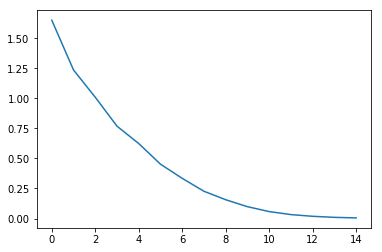

In [27]:
plt.plot(losses)